In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()

from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

from xgboost import XGBClassifier

In [3]:
#intervening fit
i_c = pd.read_csv("intervening_fit.txt", sep='\t')
#intervening fit without nan or inf or -inf
i_c_2 = i_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

#getting all the file names which have nan or inf or -inf
all_i = i_c.merge(i_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
intervening_non_fit = all_i[all_i['_merge'] == 'left_only']
# for i in intervening_non_fit['Filename'].tolist():
#     print(i)

#associated fit
a_c = pd.read_csv("associated_fit.txt", sep='\t')
#associated fit without nan or inf or -inf
a_c_2 = a_c.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

all_a = a_c.merge(a_c_2.drop_duplicates(), on = ['Filename'], how='left', indicator=True)
associated_non_fit_c = all_a[all_a['_merge'] == 'left_only']
# for i in associated_non_fit_c['Filename'].tolist():
#     print(i)

#adding coloumn int or ass to all fits
i_c_2['Class'] = '1'
a_c_2['Class'] = '0'

i_c_2.reset_index(drop=True, inplace=True)
a_c_2.reset_index(drop=True, inplace=True)

tot_fit = pd.concat([a_c_2, i_c_2])
tot_fit

,Filename,Success,Nchan,dof,chi^2,chi^2/dof,rms,A,dA,B_1,...,dX,W_50,dW_50,W_20,dW_20,F_peak,dF_peak,F_int,dF_int,Class
0,0035+22_omd+17.DAT,1,57,49,15.77810,0.322002,0.01,-2.031630e-03,1.606120e-01,0.042972,...,1.623070e+14,13777.40000,2.446390e+16,13777.4000,2.446390e+16,0.000000e+00,0.000000e+00,-2.907700e+00,1.011030e+12,0
1,0105-008_gmrt.freq,1,171,166,11.97330,0.072128,0.01,2.438270e-01,3.728630e+00,0.139187,...,1.250210e+00,15.33200,1.821070e+00,23.9489,2.427310e+00,5.937710e-02,5.261230e-03,9.867140e-01,9.323590e-02,0
2,0941-08_omd+17.DAT,0,63,58,39.50130,0.681057,0.01,2.159550e-02,3.991910e+13,4.699980,...,4.556220e+15,54.25080,4.286510e+16,74.3462,2.616900e+16,2.100440e-02,3.614960e+13,1.148100e+00,1.194950e+15,0
3,101301.DAT,0,154,146,19.94720,0.136625,0.01,2.617700e-03,5.821530e-03,3.801320,...,2.562070e+09,7.34990,1.709560e+09,13.1391,3.578920e+09,1.002560e+11,1.479900e+21,8.763770e+11,1.272970e+22,0
4,1142+052_gmrt.freq,0,87,79,1.09247,0.013829,0.01,3.403460e-03,7.835070e-03,0.362294,...,1.701640e+01,107.43200,3.198280e+01,122.1560,3.922280e+01,6.416640e-03,4.390680e-03,5.615220e-01,2.346570e-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39,SPEC_J1438d.DAT,0,505,500,5213.26000,10.426500,0.01,3.138980e-01,8.036160e-02,0.208432,...,1.927660e-01,17.19860,4.745100e-01,25.2765,4.985670e-01,2.772700e-01,5.899940e-03,4.950640e+00,8.794670e-02,1
40,SPEC_J1443.DAT,2,512,507,214.34600,0.422772,0.01,5.226290e+09,2.012170e+12,0.089580,...,3.808220e-01,8.42792,4.144900e-01,13.2778,4.576460e+00,3.339130e-01,1.145490e-01,3.088430e+00,1.815330e-01,1
41,SPEC_J1551.DAT,1,511,506,40849.20000,80.729600,0.01,1.734130e+07,4.822570e+11,7.800820,...,3.799910e+15,-62.12320,7.101660e+15,-107.2050,1.998420e+15,4.079830e+00,3.956260e+09,5.314440e+01,3.009800e+16,1
42,SPEC_J1639.DAT,0,512,504,6577.90000,13.051400,0.01,4.809480e-01,2.592260e-01,0.210122,...,5.206090e-02,23.00760,1.183090e-01,30.3062,2.114130e-01,6.614940e-01,4.192530e-03,1.504510e+01,6.214660e-02,1


In [4]:
for i in [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]:
    print(tot_fit.columns[i])

A
B_1
B_2
C
XE_0
XP_0
W
N
X
W_50
W_20
F_peak
F_int


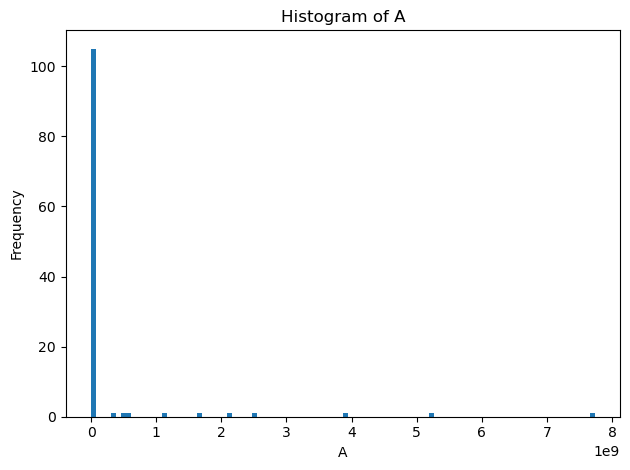

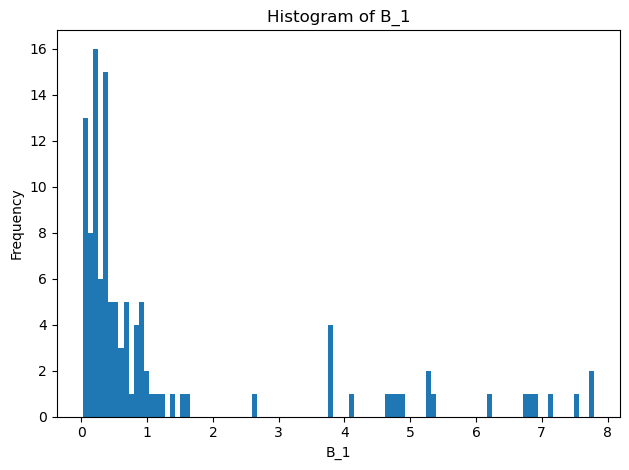

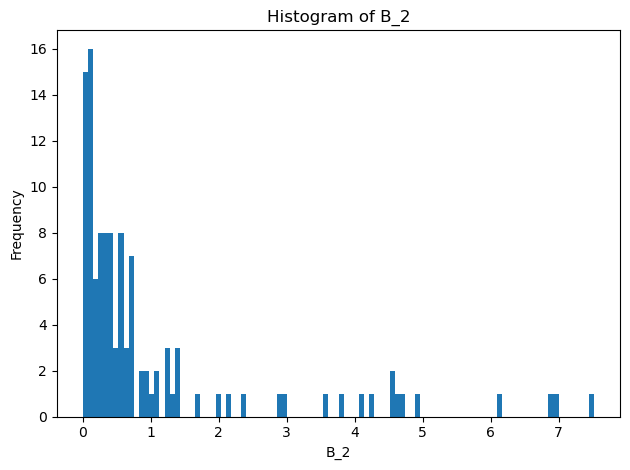

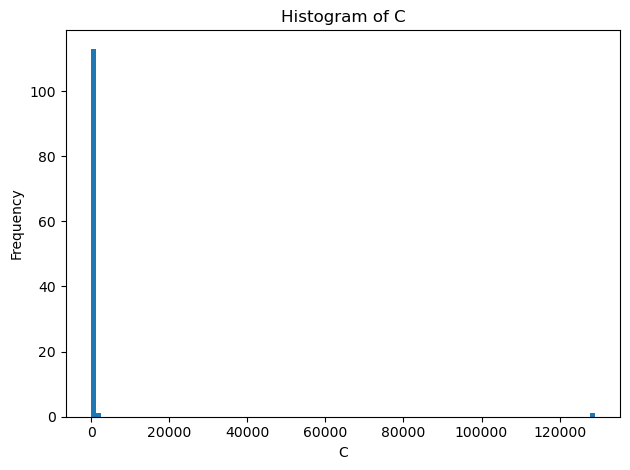

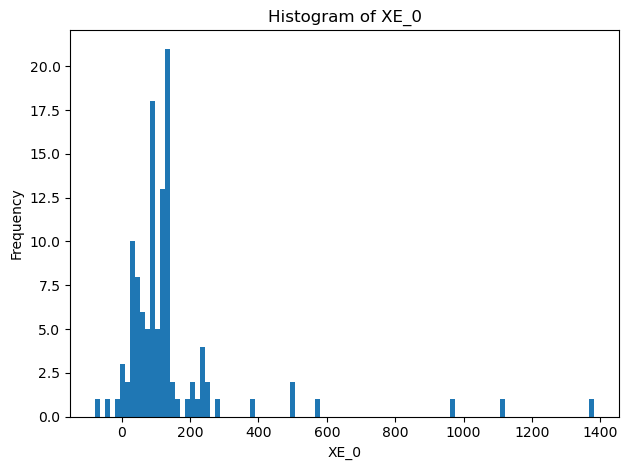

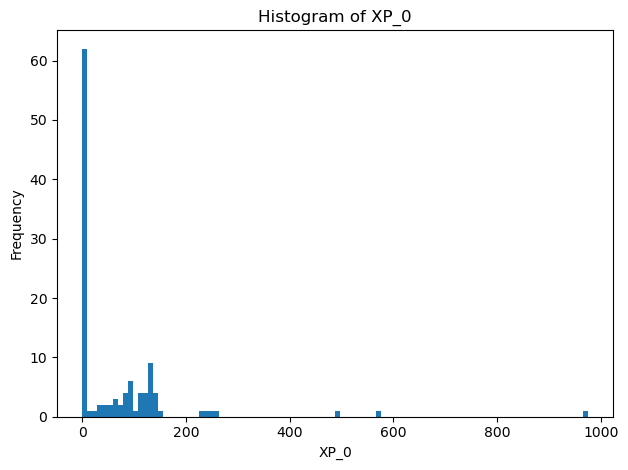

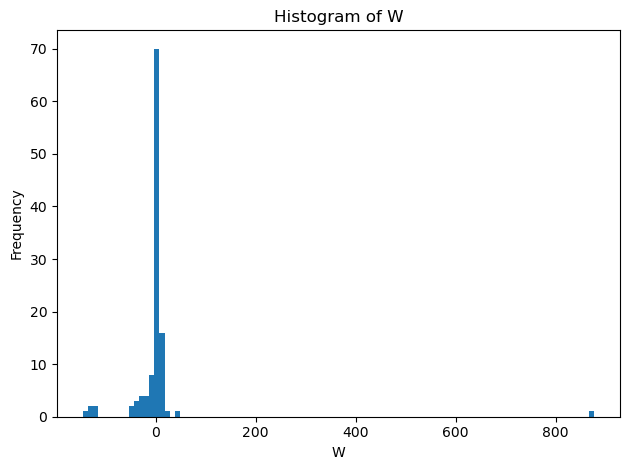

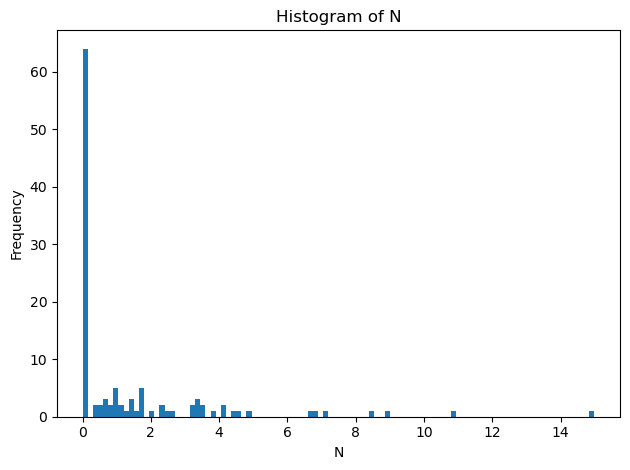

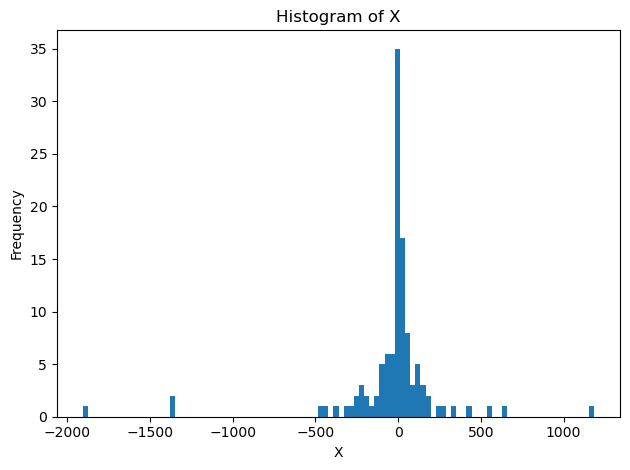

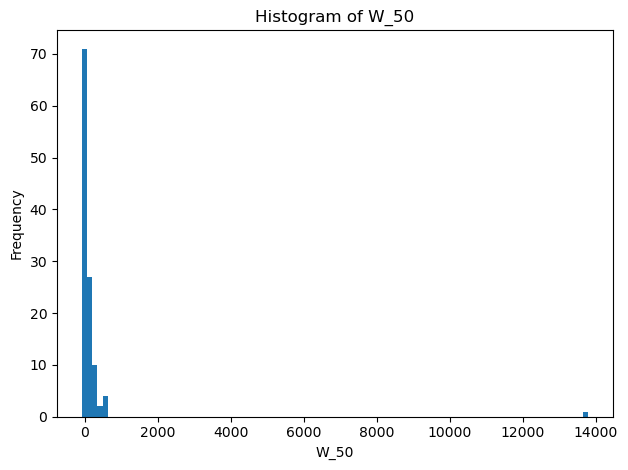

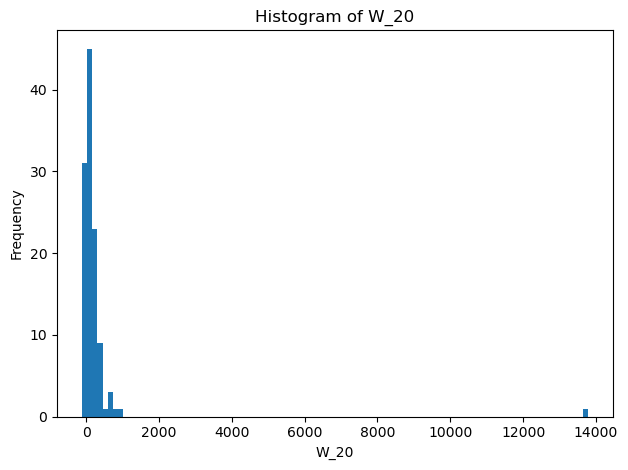

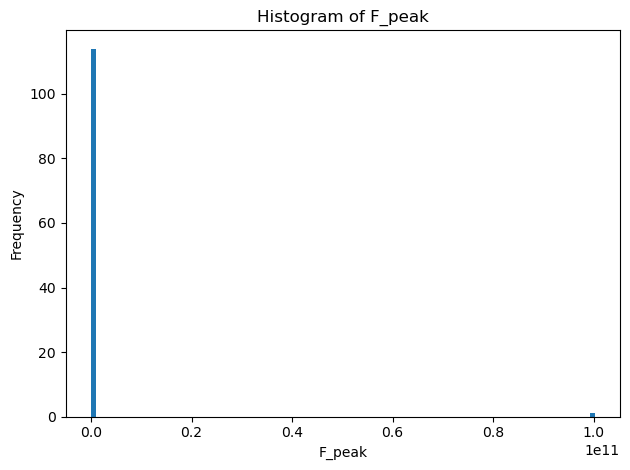

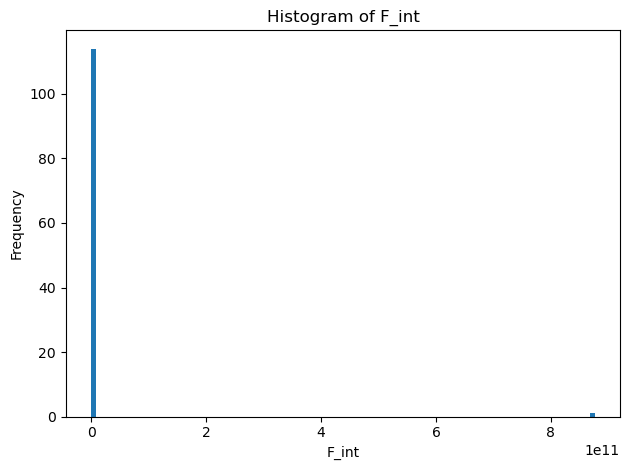

In [6]:
for i in [7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]:
    
    plt.hist(tot_fit.iloc[:,i], bins=100)
    plt.xlabel(tot_fit.columns[i])
    plt.ylabel('Frequency')
    plt.title('Histogram of ' + tot_fit.columns[i])
    plt.tight_layout()
    plt.savefig('./histograms/histogram_of_'+tot_fit.columns[i])
    plt.show()

In [7]:
tot_fit.iloc[:, [0, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]].to_csv('./csv_of_fit_prms_paper_corrected.csv')